## Crop and Fertilizer Recommendation System using Machine Learning



In [3]:
# Importing necessary libarary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Loading the data set 
crop=pd.read_csv("dataset/Crop_recommendation.csv")


In [5]:
# Going to return the starting 5 rows
crop.head()


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [6]:
# Going to return the last 5 rows
crop.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [7]:
# shape - Returns rows and columns
crop.shape 

(2200, 8)

In [8]:
# Returns information of dataset
crop.info

<bound method DataFrame.info of         N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]>

In [9]:
# Returns the sum of missing values
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [11]:
 # Check for missing values
crop.isnull()

,N,P,K,temperature,humidity,ph,rainfall,label
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2195,False,False,False,False,False,False,False,False
2196,False,False,False,False,False,False,False,False
2197,False,False,False,False,False,False,False,False
2198,False,False,False,False,False,False,False,False


In [16]:
 # Check for duplicated values
crop.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2195    False
2196    False
2197    False
2198    False
2199    False
Length: 2200, dtype: bool

In [10]:
# Return sum of duplicated values
crop.duplicated().sum()


0

In [12]:
 # To check the statistics of the dataset
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [13]:
# Shows all the columns
crop.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [17]:
# check the target feature distribution
crop['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

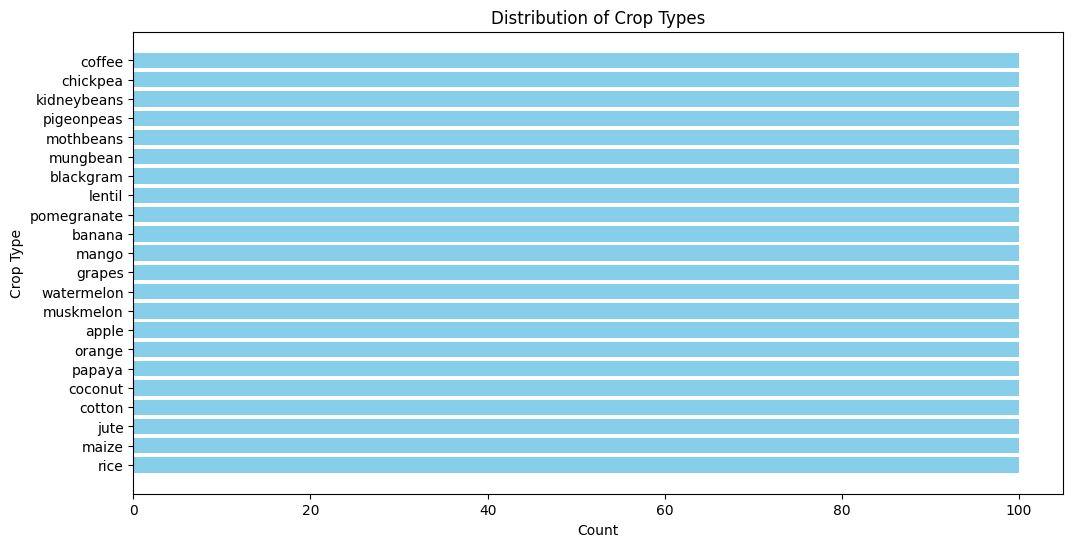

In [19]:
crop_counts = crop['label'].value_counts()
plt.figure(figsize=(12, 6))
plt.barh(crop_counts.index, crop_counts.values, color='skyblue')
plt.xlabel('Count')
plt.ylabel('Crop Type')
plt.title('Distribution of Crop Types')
plt.show()

In [ ]:
# Based on the dataset provided for each crop should have average conditions so the crop is more likely to grow well because of these conditions(ranges) for successful cultivation based on the dataset.

# Calculate average for each crop in the  column  'label' (crop name)
average_by_crop = crop.groupby('label').mean(numeric_only=True)

# Display the result in a DataFrame for better understanding.
print(average_by_crop)


                  N       P       K  temperature   humidity        ph  \
label                                                                   
apple         20.80  134.22  199.89    22.630942  92.333383  5.929663   
banana       100.23   82.01   50.05    27.376798  80.358123  5.983893   
blackgram     40.02   67.47   19.24    29.973340  65.118426  7.133952   
chickpea      40.09   67.79   79.92    18.872847  16.860439  7.336957   
coconut       21.98   16.93   30.59    27.409892  94.844272  5.976562   
coffee       101.20   28.74   29.94    25.540477  58.869846  6.790308   
cotton       117.77   46.24   19.56    23.988958  79.843474  6.912675   
grapes        23.18  132.53  200.11    23.849575  81.875228  6.025937   
jute          78.40   46.86   39.99    24.958376  79.639864  6.732778   
kidneybeans   20.75   67.54   20.05    20.115085  21.605357  5.749411   
lentil        18.77   68.36   19.41    24.509052  64.804785  6.927932   
maize         77.76   48.44   19.79    22.389204  6